In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

##Import libraris

In [2]:
import pandas as pd
import numpy as np

##Import Datasets

In [3]:
# !unzip '/content/drive/MyDrive/Fraud Detection/Proj3.zip' -d '/content/drive/MyDrive/Fraud Detection/'

In [4]:
test_identity = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/test_identity.csv")
train_identity = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/train_identity.csv")
test_transaction = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/test_transaction.csv")
train_transaction = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/train_transaction.csv")

##Remove columns full of null values

In [5]:
for col in train_transaction.columns:
  print(train_transaction[col].isna().sum())
  if train_transaction[col].isna().sum() > 400000:
    train_transaction.drop(labels=[col], axis=1, inplace=True)
    test_transaction.drop(labels=[col], axis=1, inplace=True)

0
0
0
0
0
0
8933
1565
1577
4259
1571
65706
65706
352271
552913
94456
453249
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1269
280797
262878
168922
309841
517353
551623
515614
515614
76022
279287
525823
528588
528353
89113
271100
271100
271100
281444
350482
169360
346265
346252
346252
279287
279287
279287
279287
279287
279287
279287
279287
279287
279287
279287
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
76073
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
168969
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
77096
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
89164
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314
314

In [6]:
for i, col in enumerate(train_identity.columns):
  if train_identity[col].isna().sum() > 65000:
    test_identity.drop([col.replace("_","-")], inplace=True, axis=1)
    train_identity.drop([col], inplace=True, axis=1)

##Save Datasets

In [7]:
train_transaction.to_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_train_transaction.csv")
test_transaction.to_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_test_transaction.csv")

In [8]:
train_identity.to_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_train_identity.csv")
test_identity.to_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_test_identity.csv")

##Import not null datasets

In [9]:
train_transaction = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_train_transaction.csv")
train_transaction.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

test_transaction = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_test_transaction.csv")
test_transaction.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

train_identity = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_train_identity.csv")
train_identity.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

test_identity = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/not_null_test_identity.csv")
test_identity.drop(labels=["Unnamed: 0"], axis=1, inplace=True)

##Merge transaction and identity

In [10]:
train = pd.merge(train_transaction, train_identity, on="TransactionID")
test = pd.merge(test_transaction, test_identity, on="TransactionID")

##Remove null columns from merged dataset

In [11]:
for i in train.columns:
  if train[i].isna().sum() > 70000:
      train.drop([i], inplace=True, axis=1)

##Find categorical columns 
and remove categorical columns with many classes 

In [12]:
one_hot = []
for i in train.columns:
  if i == 'isFraud':
    continue
  if len(np.unique(train[i].astype(str))) == 1:
    train.drop([i], inplace=True, axis=1)
    continue
  print(i)
  if all(isinstance(x, int) or isinstance(x, float) for x in train[i]):
    print('int')
    if len(np.unique(train[i].astype(str))) <= 5:
      print(len(np.unique(train[i].astype(str))))
      print('categorical int')
      one_hot.append(i)
  else:
    if len(np.unique(train[i].astype(str))) <= 5:
      print(len(np.unique(train[i].astype(str))))
      print('categorical string')
      one_hot.append(i)
    else:
      train.drop([i], inplace=True, axis=1)
  print("-----")

TransactionID
int
-----
TransactionDT
int
-----
TransactionAmt
int
-----
ProductCD
4
categorical string
-----
card1
int
-----
card2
int
-----
card3
int
-----
card4
5
categorical string
-----
card5
int
-----
card6
4
categorical string
-----
addr1
int
-----
addr2
int
-----
P_emaildomain
-----
C1
int
-----
C2
int
-----
C3
int
-----
C4
int
-----
C6
int
-----
C7
int
-----
C8
int
-----
C10
int
-----
C11
int
-----
C12
int
-----
C13
int
-----
C14
int
-----
D1
int
-----
V95
int
-----
V96
int
-----
V97
int
-----
V98
int
-----
V99
int
-----
V100
int
-----
V101
int
-----
V102
int
-----
V103
int
-----
V104
int
-----
V105
int
-----
V106
int
-----
V107
int
2
categorical int
-----
V108
int
-----
V109
int
-----
V110
int
-----
V111
int
-----
V112
int
-----
V113
int
-----
V114
int
-----
V115
int
-----
V116
int
-----
V117
int
5
categorical int
-----
V118
int
5
categorical int
-----
V119
int
5
categorical int
-----
V120
int
5
categorical int
-----
V121
int
5
categorical int
-----
V122
int
5
categorical int

##Encode categorical columns with one hot encoder

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


new_train = np.array(train)
for col in one_hot:
  data = train[col].astype(str)
  values = np.array(data)
  print(values)
  # integer encodefrom keras.utils import to_cate

  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  print(integer_encoded)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  print(onehot_encoded)
  new_train = np.concatenate((new_train,onehot_encoded), axis =1)
  print(new_train.shape)


['H' 'H' 'C' ... 'C' 'R' 'C']
[1 1 0 ... 0 2 0]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
(144233, 136)
['mastercard' 'visa' 'mastercard' ... 'mastercard' 'visa' 'mastercard']
[2 4 2 ... 2 4 2]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
(144233, 141)
['credit' 'debit' 'credit' ... 'credit' 'credit' 'debit']
[1 2 1 ... 1 1 2]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
(144233, 145)
['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']
[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(144233, 147)
['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']
[1 1 1 ... 1 1 1]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(144233, 152)
['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']
[1 1 1 ... 1 1 1]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 .

In [15]:
sparse = []
print(new_train.shape)
for i in new_train:
  sparse.append(i[132:])
np.array(sparse).shape


(144233, 209)


(144233, 77)

In [16]:
train.drop(labels=one_hot, axis=1, inplace=True)
train.shape

(144233, 111)

##Drop Transactio Id column

In [17]:
train.drop(['TransactionID'], axis=1, inplace=True)
train = np.concatenate((np.array(train),np.array(sparse)), axis=1)

train.shape

(144233, 187)

##Split fraud and normal data

In [18]:
normal = []
fraud = []
for i in train:
  if i[0] == 0:
    normal.append(i)
  else:
    fraud.append(i)

##Remove isFraud column

In [19]:
new_normal = []
for i in normal:
  new_normal.append(i[1:])
new_fraud = []
for i in fraud:
  new_fraud.append(i[1:])
print(np.array(new_normal).shape)
print(np.array(new_fraud).shape)


(132915, 186)
(11318, 186)


In [20]:
X = pd.DataFrame(new_normal)
fraud_x = pd.DataFrame(new_fraud)

##Save Fraud and Normal dataset

In [21]:
X.to_csv("./drive/MyDrive/Fraud Detection/Proj3/X.csv")
fraud_x.to_csv("./drive/MyDrive/Fraud Detection/Proj3/fraud_x.csv")


In [22]:
normal = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/X.csv")
fraud = pd.read_csv("./drive/MyDrive/Fraud Detection/Proj3/fraud_x.csv")
normal.drop(["Unnamed: 0"], axis=1, inplace=True)
fraud.drop(["Unnamed: 0"], axis=1, inplace=True)

##Fill null values with avrage of column

###find avrage of each column

In [23]:
values = {}
for i in normal.columns:
  print(normal[i].isna().sum())
  print(type(normal[i]))
  values[i] = np.mean(normal[i])
  print(values[i])
  print("-------")

fraud_values = {}
for i in fraud.columns:
  print(fraud[i].isna().sum())
  print(type(fraud[i]))
  fraud_values[i] = np.mean(fraud[i])
  print(fraud_values[i])
  print("-------")

  

0
<class 'pandas.core.series.Series'>
6041497.576247978
-------
0
<class 'pandas.core.series.Series'>
83.10698908325327
-------
0
<class 'pandas.core.series.Series'>
9929.935770981454
-------
664
<class 'pandas.core.series.Series'>
394.021557492949
-------
160
<class 'pandas.core.series.Series'>
160.85456668298747
-------
890
<class 'pandas.core.series.Series'>
191.79369816322665
-------
53014
<class 'pandas.core.series.Series'>
296.80656061876573
-------
53014
<class 'pandas.core.series.Series'>
86.25260009261461
-------
0
<class 'pandas.core.series.Series'>
25.284053718541927
-------
0
<class 'pandas.core.series.Series'>
30.917202723545124
-------
0
<class 'pandas.core.series.Series'>
0.024955798818793964
-------
0
<class 'pandas.core.series.Series'>
14.710627092502728
-------
0
<class 'pandas.core.series.Series'>
14.686867546928488
-------
0
<class 'pandas.core.series.Series'>
9.668607756837076
-------
0
<class 'pandas.core.series.Series'>
17.933935221758265
-------
0
<class 'pandas

###fill nulls

In [24]:
normal = normal.fillna(value=values)
fraud = fraud.fillna(value=fraud_values)


##Scale data with MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

normal = sc.fit_transform(normal)
fraud = sc.fit_transform(fraud)

##Splite test data from normal dataset

In [26]:
X = normal[:120000]
normal_test = normal[120000:]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185
0,0.000000,0.027642,0.201023,0.828,0.381679,0.014599,0.727273,0.831461,0.000213,0.000176,0.0,0.000000,0.000444,0.000000,0.000300,0.000307,0.000314,0.000000,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000002,0.008195,0.103645,0.000,0.381679,0.919708,0.538636,0.831461,0.000213,0.000176,0.0,0.000000,0.000444,0.000000,0.000300,0.000307,0.000314,0.000000,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000003,0.042026,0.890779,0.504,0.129771,0.248175,0.447288,0.823063,0.000213,0.000703,0.0,0.000444,0.000444,0.000443,0.000300,0.000307,0.000627,0.000627,0.000685,0.0007,0.001563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000003,0.009026,0.198954,0.550,0.648855,0.905109,0.447288,0.823063,0.000213,0.000176,0.0,0.000444,0.000444,0.000443,0.000300,0.000307,0.000314,0.000314,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.000007,0.016530,0.045413,0.910,0.381679,0.919708,0.159091,0.831461,0.000213,0.000176,0.0,0.000000,0.000444,0.000000,0.000300,0.000307,0.000314,0.000000,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.877656,0.020391,0.496264,0.060,0.648855,0.277372,0.447288,0.823063,0.000213,0.000176,0.0,0.000444,0.000444,0.000443,0.000300,0.000307,0.000314,0.000314,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
119996,0.877664,0.004438,0.198954,0.550,0.648855,0.905109,0.447288,0.823063,0.000213,0.000176,0.0,0.000444,0.000444,0.000443,0.000300,0.000307,0.000314,0.000314,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
119997,0.877670,0.012978,0.461370,0.890,0.648855,0.270073,0.447288,0.823063,0.000213,0.000351,0.0,0.000444,0.000444,0.000443,0.000300,0.000307,0.000314,0.000314,0.000343,0.0007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0.25,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.

# Auto Encoder Model

##Import libraris

In [27]:
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout,Input,BatchNormalization , Add


##Encoder

In [28]:
encoder_input = Input(186,name = 'input_encoder')
encoder = Dense(128, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = Dense(64, activation='relu',name = 'encoder_layer2')(encoder)
encoder = BatchNormalization(name = 'encoder_layer3')(encoder)
encoder = Dropout(0.2 , name = 'encoder_layer4')(encoder)
encoder = Dense(512, activation='relu',name = 'encoder_layer5')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer6')(encoder)
encoder = Dense(256, activation='relu',name = 'encoder_layer7')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer8')(encoder)
encoder = BatchNormalization(name = 'encoder_layer9')(encoder)
encoder = Dropout(0.2 , name = 'encoder_layer10')(encoder)
encoder_output = Dense(10, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 186)]             0         
                                                                 
 encoder_layer1 (Dense)      (None, 128)               23936     
                                                                 
 encoder_layer2 (Dense)      (None, 64)                8256      
                                                                 
 encoder_layer3 (BatchNormal  (None, 64)               256       
 ization)                                                        
                                                                 
 encoder_layer4 (Dropout)    (None, 64)                0         
                                                                 
 encoder_layer5 (Dense)      (None, 512)               33280     
                                                           

##Decoder

In [29]:
decoder_input = Input(10,name = 'input_decoder')
decoder = Dense(128, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(256, activation='relu',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.2 , name = 'decoder_layer4')(decoder)
decoder = Dense(512, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer6')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer7')(decoder)
decoder = Dense(64, activation='relu',name = 'decoder_layer8')(decoder)
decoder = BatchNormalization(name = 'decoder_layer9')(decoder)
decoder = Dropout(0.2 , name = 'decoder_layer10')(decoder)
decoder_output = Dense(186,activation = 'sigmoid',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_decoder (InputLayer)  [(None, 10)]              0         
                                                                 
 decoder_layer1 (Dense)      (None, 128)               1408      
                                                                 
 decoder_layer2 (Dense)      (None, 256)               33024     
                                                                 
 decoder_layer3 (BatchNormal  (None, 256)              1024      
 ization)                                                        
                                                                 
 decoder_layer4 (Dropout)    (None, 256)               0         
                                                                 
 decoder_layer5 (Dense)      (None, 512)               131584    
                                                           

##Auto Encoder

In [30]:
autoencoder_input = Input(186,name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_autoencoder (InputLay  [(None, 186)]            0         
 er)                                                             
                                                                 
 Encoder (Functional)        (None, 10)                280202    
                                                                 
 Decoder (Functional)        (None, 186)               351866    
                                                                 
Total params: 632,068
Trainable params: 631,172
Non-trainable params: 896
_________________________________________________________________


##Compile model

In [31]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

##Create callbacks

In [32]:
from keras.callbacks import ReduceLROnPlateau

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-9)

##Train Model

In [33]:
history = autoencoder.fit(X, X,
                    batch_size = 128,
                    validation_split = 0.2,
                              epochs= 50,
                              callbacks=[lrr])

Epoch 1/50
750/750 [==============================] - 11s 10ms/step - loss: 0.0454 - accuracy: 0.0175 - val_loss: 0.0156 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
750/750 [==============================] - 8s 10ms/step - loss: 0.0130 - accuracy: 0.0040 - val_loss: 0.0102 - val_accuracy: 0.0203 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - 7s 10ms/step - loss: 0.0106 - accuracy: 0.0053 - val_loss: 0.0094 - val_accuracy: 8.3333e-05 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0096 - accuracy: 0.0017 - val_loss: 0.0090 - val_accuracy: 2.0833e-04 - lr: 0.0010
Epoch 5/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0090 - accuracy: 8.1250e-04 - val_loss: 0.0087 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0086 - accuracy: 3.4375e-04 - val_loss: 0.0084 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/50
750/750 [==================

##Save model

In [34]:
autoencoder.save("./drive/MyDrive/Fraud Detection")

INFO:tensorflow:Assets written to: ./drive/MyDrive/Fraud Detection/assets


##Loss Plot

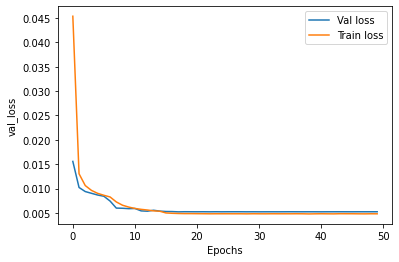

In [35]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


#Finde Threshold

##Test Data loss value


*   splite normal_test and fraud dataset into find_threshold_dataset and final_test

*   give fraud and normal datasets to trained model and calculate loss value with categorical_crossentropy loss function

*   plot loss values


normal loss mean: 138.47027889405237
fraud loss mean: 158.68006371159564


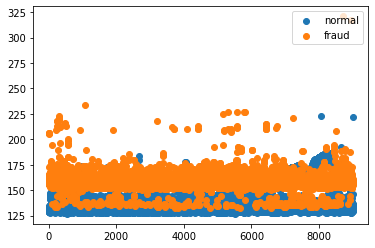

In [36]:
from keras import losses
import seaborn as sns
import matplotlib.pyplot as plt 

fin_th_normal = normal_test[:9000]
predicted_x = autoencoder.predict(x=fin_th_normal)
normal_loss = losses.categorical_crossentropy(predicted_x, fin_th_normal)
print('normal loss mean:', np.mean(normal_loss))

find_th_fraud = fraud[:9000]
predicted_fraud_x = autoencoder.predict(x=find_th_fraud)
fraud_loss = losses.categorical_crossentropy(predicted_fraud_x, find_th_fraud)
print('fraud loss mean:', np.mean(fraud_loss))

normal_x = []
normal_y = []
fraud_x = []
fraud_y = []

for i in range(len(normal_loss)):
  normal_x.append(i)
  normal_y.append(normal_loss[i])
for i in range(len(fraud_loss)):
  fraud_x.append(i)
  fraud_y.append(fraud_loss[i])
plt.scatter(normal_x, normal_y, label='normal')
plt.scatter(fraud_x, fraud_y, label='fraud')
plt.legend(['normal','fraud'], loc='upper right')


In [37]:
final_test_normal = normal_test[9000:]
final_test_fraud= fraud[9000:]
print(final_test_normal.shape)
print(final_test_fraud.shape)

(3915, 186)
(2318, 186)


##Find threshold

In [38]:
min = np.min(normal_y)
max = np.max(fraud_y)
print(max)
max_th = 0
th = 0
min = int(min)
max = int(max+1)
print(min, max)
for i in range(min, max):
  print(i)
  bad = 0
  good = 0
  for j in normal_y:
    if j < i:
      good += 1
    else:
      bad += 1
  for j in fraud_y:
    if j > i:
      good += 1
    else:
      bad += 1
  print(good, bad)
  score = good / (good + bad)
  if score > max_th:
    max_th = score
    th = i

print('th:', th)

321.01801642586514
126 322
126
9000 9000
127
9002 8998
128
9125 8875
129
9626 8374
130
10267 7733
131
10841 7159
132
11469 6531
133
12855 5145
134
13720 4280
135
14852 3148
136
15402 2598
137
15656 2344
138
15753 2247
139
15835 2165
140
15893 2107
141
15940 2060
142
15987 2013
143
16073 1927
144
16143 1857
145
16236 1764
146
16315 1685
147
16365 1635
148
16412 1588
149
16417 1583
150
16419 1581
151
16404 1596
152
16308 1692
153
16073 1927
154
15711 2289
155
15229 2771
156
14790 3210
157
13800 4200
158
13112 4888
159
12087 5913
160
10622 7378
161
9889 8111
162
9347 8653
163
9186 8814
164
9060 8940
165
8997 9003
166
8911 9089
167
8857 9143
168
8846 9154
169
8809 9191
170
8792 9208
171
8755 9245
172
8768 9232
173
8768 9232
174
8825 9175
175
8838 9162
176
8837 9163
177
8824 9176
178
8836 9164
179
8844 9156
180
8871 9129
181
8907 9093
182
8934 9066
183
8971 9029
184
9035 8965
185
9085 8915
186
9099 8901
187
9100 8900
188
9096 8904
189
9090 8910
190
9082 8918
191
9079 8921
192
9076 8924
193


##Final test 

In [39]:
predicted_x = autoencoder.predict(x=final_test_normal)
normal_loss = losses.categorical_crossentropy(predicted_x, final_test_normal)
print('normal loss mean:', np.mean(normal_loss))

predicted_fraud_x = autoencoder.predict(x=final_test_fraud)
fraud_loss = losses.categorical_crossentropy(predicted_fraud_x, final_test_fraud)
print('fraud loss mean:', np.mean(fraud_loss))

right = 0
wrong = 0
for i in normal_loss:
  if i < 150:
    right += 1
  else:
    wrong += 1
  
for i in fraud_loss:
  if i > 150:
    right += 1
  else:
    wrong += 1
print(right)
print(wrong + right)

print('Final Accuracy:', right / (right + wrong))

normal loss mean: 133.90568594584119
fraud loss mean: 159.24645146511344
6096
6233
Final Accuracy: 0.9780202149847586
